# Automobile Price Prediction with Linear Regression

In [1]:
import pyforest

In [2]:
car=pd.read_csv(r"C:\Users\AKSHAY\Downloads\car_price.csv")
car.head()

<IPython.core.display.Javascript object>

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
car.shape

(205, 26)

In [4]:
car.describe()

,symboling,drive_wheels,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
car.isna().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [6]:
car.replace("?",np.nan,inplace=True)

<IPython.core.display.Javascript object>

In [7]:
car.isna().mean().sort_values(ascending=False).head(10)

normalized_losses    0.200000
price                0.019512
stroke               0.019512
bore                 0.019512
peak_rpm             0.009756
horsepower           0.009756
num_of_doors         0.009756
length               0.000000
Fuel_type            0.000000
make                 0.000000
dtype: float64

In [8]:
car['normalized_losses'].fillna(car['normalized_losses'].median(),inplace=True)

In [9]:
car['price'].dropna(inplace=True)

In [10]:
li=['normalized_losses','stroke','bore','peak_rpm','horsepower']
for i in li:
    car[i]=car[i].fillna(car[i].median())

In [11]:
car['normalized_losses']

0      115
1      115
2      115
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized_losses, Length: 205, dtype: object

In [12]:
car['num_of_doors'].fillna('four',inplace=True)

In [13]:
car.dropna(subset=['price'],inplace=True)

In [14]:
car.isna().mean().sort_values(ascending=False).head(10)

price                0.0
highway_mpg          0.0
normalized_losses    0.0
Fuel_type            0.0
make                 0.0
num_of_doors         0.0
aspiration           0.0
wheel_base           0.0
engine_location      0.0
drive_wheels         0.0
dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [16]:
[i for i in car.columns if car[i].dtype=="O"]

['normalized_losses',
 'Fuel_type',
 'make',
 'num_of_doors',
 'aspiration',
 'wheel_base',
 'engine_location',
 'body_style',
 'engine_type',
 'num_of_cylinders',
 'fuel_system',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

In [17]:
li_float=['normalized_losses','stroke','horsepower','peak_rpm','price']

In [18]:
car['bore']=car['bore'].astype(float)

In [19]:
for i in li_float:
    car[i]=car[i].astype(float)

In [20]:
li_cat=[i for i in car.columns if car[i].dtype=="O"]
li_cat

['Fuel_type',
 'make',
 'num_of_doors',
 'aspiration',
 'wheel_base',
 'engine_location',
 'body_style',
 'engine_type',
 'num_of_cylinders',
 'fuel_system']

In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
car[car.select_dtypes(include=['object']).columns]=car[car.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [22]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
car.drop(['symboling'],axis=1,inplace=True)

In [24]:
car.sample(7)

,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
180,90.0,1,0,0,3,2,0,104.5,19,187.8,66.5,54.1,3131,0,3,171,5,3.27,3.35,9.2,156.0,5200.0,20,24,15690.0
189,115.0,1,0,1,0,1,0,94.5,20,159.3,64.2,55.6,2254,2,2,109,5,3.19,3.40,8.5,90.0,5500.0,24,29,11595.0
75,115.0,1,1,1,2,2,0,102.7,10,178.4,68.0,54.8,2910,2,2,140,5,3.78,3.12,8.0,175.0,5000.0,19,24,16503.0
17,115.0,1,0,0,3,2,0,110.0,2,197.0,70.9,56.3,3505,2,3,209,5,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
162,91.0,1,0,0,3,1,0,95.7,19,166.3,64.4,52.8,2140,2,2,98,1,3.19,3.03,9.0,70.0,4800.0,28,34,9258.0
40,85.0,1,0,0,3,1,0,96.5,5,175.4,62.5,54.1,2372,2,2,110,0,3.15,3.58,9.0,86.0,5800.0,27,33,10295.0
187,94.0,0,1,0,3,1,0,97.3,20,171.7,65.5,55.7,2319,2,2,97,3,3.01,3.40,23.0,68.0,4500.0,37,42,9495.0


In [25]:
car.shape

(201, 25)

In [26]:
train,test = train_test_split(car,test_size=0.2)

<IPython.core.display.Javascript object>

In [27]:
train.shape,test.shape

((160, 25), (41, 25))

In [28]:
# x of Train and Test
car_train_x=train.iloc[:,:-1]
car_test_x = test.iloc[:,:-1]

In [29]:
# y of Train and Test
car_train_y=train['price']
car_test_y=test['price']

In [30]:
reg = LinearRegression() # Giving Name to Model by creating Object
reg.fit(car_train_x,car_train_y) # Fitting Model

pred_train=reg.predict(car_train_x)      # To predict Data
pred_test= reg.predict(car_test_x)

<IPython.core.display.Javascript object>

In [31]:
# Evaluate Performance
Rsquare = reg.score(car_train_x,car_train_y)
Rsquare

0.9025557801708717

In [32]:
# Evaluate Performance
Rsquare = reg.score(car_test_x,car_test_y)
Rsquare

0.8458697312848361

In [33]:
N=car_train_x.shape[0]   # Use N and K for Train Data Only

K=car_train_x.shape[1]

Adjusted_R2=1-((1-Rsquare)*(N-1)/(N-K-1))
Adjusted_R2

0.8184687946243625

In [34]:
# Assumption
error_train= car_train_y- pred_train
error_test = car_test_y- pred_test

In [35]:
error_train.mean() # This values is very very close to zero

-1.3733369996771216e-11

In [36]:
error_train.skew()

0.10125010215921684

<IPython.core.display.Javascript object>

D:\Installation\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

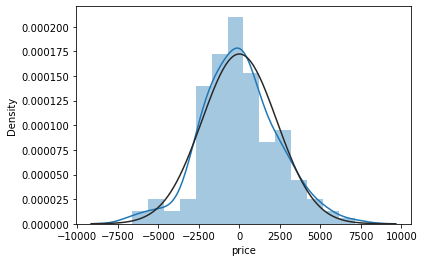

In [37]:
from scipy.stats import norm
sns.distplot(error_train,fit=norm)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

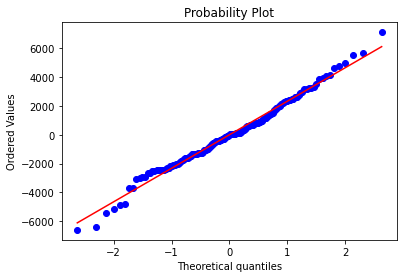

In [38]:
# Probability plot
fig=plt.figure()
stats.probplot(error_train, plot=plt)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

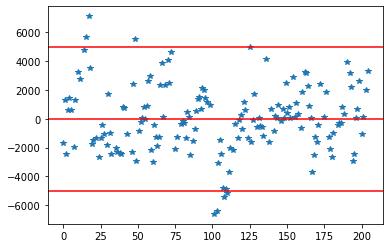

In [39]:
plt.plot(error_train ,"*")# Scatter plot
plt.axhline(y= error_train.mean(),color='r')
plt.axhline(y= 5000,color='r')
plt.axhline(y= -5000,color='r')
plt.show()  

In [40]:
Act_vs_pred=pd.DataFrame({"Predicted": pred_train,"Actual": car_train_y,"Difference":(pred_train-car_train_y)})
Act_vs_pred.sample(10)

<IPython.core.display.Javascript object>

,Predicted,Actual,Difference
39,11270.262512,8845.0,2425.262512
143,9883.876534,9960.0,-76.123466
85,9525.280012,6989.0,2536.280012
203,20492.933528,22470.0,-1977.066472
75,18606.904043,16503.0,2103.904043
159,8404.341097,7788.0,616.341097
111,19273.688022,15580.0,3693.688022
186,8759.479360,8495.0,264.479360
128,35292.895212,37028.0,-1735.104788
66,14496.383924,18344.0,-3847.616076


In [ ]:
sns.regplot("Actual","Predicted",data=Act_vs_pred,color='g')      # X Must be Actual and Y must be Predicated since Fixed
plt.show()   

<IPython.core.display.Javascript object>

D:\Installation\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(car_test_y,pred_test),"MAE")
print(mean_squared_error(car_test_y,pred_test),"MSE")
print(mean_squared_error(car_test_y,pred_test,squared=False),"RMSE")

In [ ]:
def remove_outliers(df, col, k=2):
    mean= df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean-k*sd)]
    final_list=[x for x in final_list if (x < mean + k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->", df.shape[0]-df1.shape[0])

In [ ]:
remove_outliers(car, 'price', k=2)